# CEO Questions 

## Imports

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from matplotlib import pyplot as plt
import ipywidgets as widgets
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
import time
from geopy.geocoders import Nominatim

## Auxiliary functions 

In [86]:
## # Supress Scientific Notation

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## Loading data

In [87]:
df=pd.read_csv('Datasets/kc_house_data.csv')
#df=pd.read_csv('Datasets/kc_house_data.csv',parse_dates=[1,14,15])

## Dataset info

In [95]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [96]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Columns: {}'.format( df1.shape[1] ) )

Number of Rows: 5
Number of Columns: 2


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

| Attributes     | Meaning                                                                                                                                                                                              |
|----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id             | Unique ID for each home sold                                                                                                                                                                         |
| date           | Date of the home sale                                                                                                                                                                                |
| price          | Price of each home sold                                                                                                                                                                              |
| bedrooms       | Number of bedrooms                                                                                                                                                                                   |
| bathrooms      | Number of bathrooms, where .5 accounts for a room with a toilet but no shower                                                                                                                        |
| sqft_living    | Square footage of the apartments interior living space                                                                                                                                               |
| sqft_lot       | Square footage of the land space                                                                                                                                                                     |
| floors         | Number of floors                                                                                                                                                                                     |
| waterfront     | A dummy variable for whether the apartment was overlooking the waterfront or not                                                                                                                     |
| view           | An index from 0 to 4 of how good the view of the property was                                                                                                                                        |
| condition      | An index from 1 to 5 on the condition of the apartment                                                                                                                                               |
| grade          | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. |
| sqft_above     | The square footage of the interior housing space that is above ground level                                                                                                                          |
| sqft_basement  | The square footage of the interior housing space that is below ground level                                                                                                                          |
| yr_built       | The year the house was initially built                                                                                                                                                               |
| yr_renovated   | The year of the house’s last renovation                                                                                                                                                              |
| zipcode        | What zipcode area the house is in                                                                                                                                                                    |
| sqft_living15  | The square footage of interior housing living space for the nearest 15 neighbors                                                                                                                     |
| sqft_lot15     | The square footage of the land lots of the nearest 15 neighbors    

## Qual a média do preço de compra dos imóveis por “Nível”? - 
- Nível 0 -> Preço entre R$ 0 e R$ 321.950 
- Nível 1 -> Preço entre R$ 321.950 e R$ 450.000 
- Nível 2 -> Preço entre R$ 450.000 e R$ 645.000 
- Nível 3 -> Acima de R$ 645.000


In [98]:
df['level']=df['price'].apply(lambda x:'level_00' if (x >=0)&(x<321950) else
                                      '1evel_01' if (x >=321950)&(x<450000) else
                                      '1evel_02' if (x >=45000)&(x<645000) else '1evel_03')

In [99]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,level_00
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,1evel_02
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,level_00
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,1evel_02
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,1evel_02


## Qual a média do tamanho da sala de estar dos imóveis por “Size” ? 
- Size 0 -> Tamanho entre 0 e 1427 sqft 
- Size 1 -> Tamanho entre 1427 e 1910 sqft 
- Size 2 -> Tamanho entre 1910 e 2550 sqft 
- Size 3 -> Tamanho acima de 2550 sqft

In [100]:
df['size']=df['sqft_living'].apply(lambda x:'s00' if (x >=0)&(x<1427) else
                                      's01' if (x >=1427)&(x<1910) else
                                      's02' if (x >=1910)&(x<2550) else 's03')

In [101]:
df[['size','sqft_living']].groupby('size').mean().reset_index()

,size,sqft_living
0,s00,1123.78
1,s01,1661.20
2,s02,2202.70
3,s03,3318.99


In [102]:
df['size']=df['sqft_above']

## Adicione as seguinte informações ao conjunto de dados original: 
- Place ID: Identificação da localização 
- OSM Type: Open Street Map type 
- Country: Nome do País 
- Country Code: Código do País


In [103]:
df['query']=df[['lat','long']].apply(lambda x: str(x['lat'])+','+str(x['long']),axis=1)

In [104]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level,size,query
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1955,0,98178,47.51,-122.26,1340,5650,level_00,1180,"47.5112,-122.257"
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,1951,1991,98125,47.72,-122.32,1690,7639,1evel_02,2170,"47.721,-122.319"
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,1933,0,98028,47.74,-122.23,2720,8062,level_00,770,"47.7379,-122.233"
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1965,0,98136,47.52,-122.39,1360,5000,1evel_02,1050,"47.5208,-122.393"
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1987,0,98074,47.62,-122.05,1800,7503,1evel_02,1680,"47.6168,-122.045"


## Adicione os seguinte filtros no Mapa: 
- Tamanho mínimo da área da sala de estar. 
- Número
mínimo de banheiros. 
- Valor Máximo do Preço. 
- Tamanho máximo da área do porão. 
-Filtro das Condições do Imóvel. 
- Filtro por Ano de Construção.


In [105]:
# Prepare data
    
df['is_waterfront'] = df['waterfront'].apply( lambda x: 'yes' if x == 1 else 'no' )

# # define level of prices

df['level']=df['price'].apply(lambda x:  0 if x<=321950 else
                                         1 if (x>321950)&(x<=450000)else
                                         2 if (x>450000)&(x<=645000)else 3)
df['level'] = df['level'].astype(int)

# Iteractive buttons

price_limit = widgets.IntSlider(
    value = int(df['price'].mean()),min = int(df['price'].min()),
    max = int(df['price'].max()),step = 1,description='Maximun Price',
    disable=False,style={'description_width': 'initial'}
    )

waterfront_bar = widgets.Dropdown(
    options = df['is_waterfront'].unique().tolist(),
    value = 'no',
    description = 'Water View',
    disable=False
    )

livingroom_limit = widgets.IntSlider(
    value = int( df['sqft_living'].mean() ),
    min = df['sqft_living'].min(),
    max = df['sqft_living'].max(),
    step = 1,
    description='Minimum Living Room Size',
    disable=False,
    style={'description_width': 'initial'}
)

bathroom_limit = widgets.IntSlider(
    value = int( df['bathrooms'].mean() ),
    min = df['bathrooms'].min(),
    max = df['bathrooms'].max(),
    step = 1,
    description='Minimum Bathroom Number',
    disable=False,
    style={'description_width': 'initial'}
)

basement_limit = widgets.IntSlider(
    value = int( df['sqft_basement'].mean() ),
    min = df['sqft_basement'].min(),
    max = df['sqft_basement'].max(),
    step = 1,
    description='Minimum Basement Size',
    disable=False,
    style={'description_width': 'initial'}
)

condition_limit = widgets.IntSlider(
    value = int( df['condition'].mean() ),
    min = df['condition'].min(),
    max = df['condition'].max(),
    step = 1,
    description='Minimum condition',
    disable=False,
    style={'description_width': 'initial'}
)

year_limit = widgets.IntSlider(
    value = int( df['yr_built'].mean() ),
    min = df['yr_built'].min(),
    max = df['yr_built'].max(),
    step = 1,
    description='Year Built',
    disable=False,
    style={'description_width': 'initial'}
)

In [106]:
def update_map( df, waterfront, limit, livingroom_limit, bathroom_limit,basement_limit, 
               condition_limit, year_limit ):
    houses = df[(df['price'] <= limit) &
    (df['is_waterfront'] == waterfront) &
    (df['sqft_living'] >= livingroom_limit) &
    (df['bathrooms'] >= bathroom_limit) &
    (df['sqft_basement'] >= basement_limit) &
    (df['condition'] >= condition_limit) &
    (df['yr_built'] >= year_limit )][['id', 'lat', 'long', 'price','level']]
    
#plot map
    fig = px.scatter_mapbox( houses,
            lat="lat",
            lon="long",
            size="price",
            color="level",
            color_continuous_scale=px.colors.cyclical.IceFire,
            size_max=15,
            zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()                    

In [107]:
widgets.interactive( update_map,
    df=fixed( df ),
    waterfront=waterfront_bar,
    limit=price_limit,
    livingroom_limit=livingroom_limit,
    bathroom_limit=bathroom_limit,
    basement_limit=basement_limit,
    condition_limit=condition_limit,
    year_limit=year_limit
)

## Adicione os seguinte filtros no Dashboard: 
- Filtro por data disponível para compra. 
- Filtro por ano de renovação. 
- Filtro se possui vista para a água ou não.

In [108]:
# Change df format
df['year'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y' )
df['date'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%m-%d' )
df['year_week'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%U' )

# # ----------------------------
# # Filtering
# # ----------------------------

# Widget to control df
date_limit = widgets.SelectionSlider(
options = df['date'].sort_values().unique().tolist(),
value='2014-12-01',
description='Max Available Date',
disable=False,
continuous_update=False,
orientation='horizontal',
style={'description_width': 'initial'},
readout=True
)
# # Max Year Renovated
year_limit = widgets.SelectionSlider(
options = df['yr_renovated'].sort_values().sort_values().unique().tolist(),
value=2000,
description='Max Year',
disable=False,
continuous_update=False,
orientation='horizontal',
style={'description_width': 'initial'},
readout=True
)
# # Waterfront
waterfront_limit = widgets.Checkbox(
value=False,
description='Waterfront?',
disabled=False,
indent=False )
    
def update_map( df, date_limit, year_limit, waterfront_limit ):
    # Filter df
    df = df[(df['date'] <= date_limit) & 
            (df['yr_renovated'] >= year_limit) & 
            (df['waterfront'] == waterfront_limit)].copy()
    
    fig = plt.figure( figsize=(24, 12) )
    specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )
    
    ax1 = fig.add_subplot( specs[0, :] ) # First Row
    ax2 = fig.add_subplot( specs[1, 0] ) # First Row First Column
    ax3 = fig.add_subplot( specs[1, 1] ) # Second Row First Column
    
    # First Graph
    by_year = df[['price', 'year']].groupby( 'year' ).count().reset_index()
    sns.barplot( x = 'year', y ='price', data=by_year, ax=ax1)
    
#   # Second Graph

    by_day = df[['price', 'date']].groupby( 'date' ).mean().reset_index()
    sns.lineplot( x='date', y='price',data=by_day, ax=ax2)
    ax2.set_title( "Title: Avg Price by Day" )
    
#   # Third Graph
    
    df['year_week'] = pd.to_datetime( df['date'] ).dt.strftime( '%Y-%U' )
    by_week_of_year = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()
    sns.barplot( x='year_week', y='price', data=by_week_of_year,ax=ax3 )
    ax3.set_title( "Title: Avg Price by Week of Year" )
    
    plt.xticks( rotation=60);



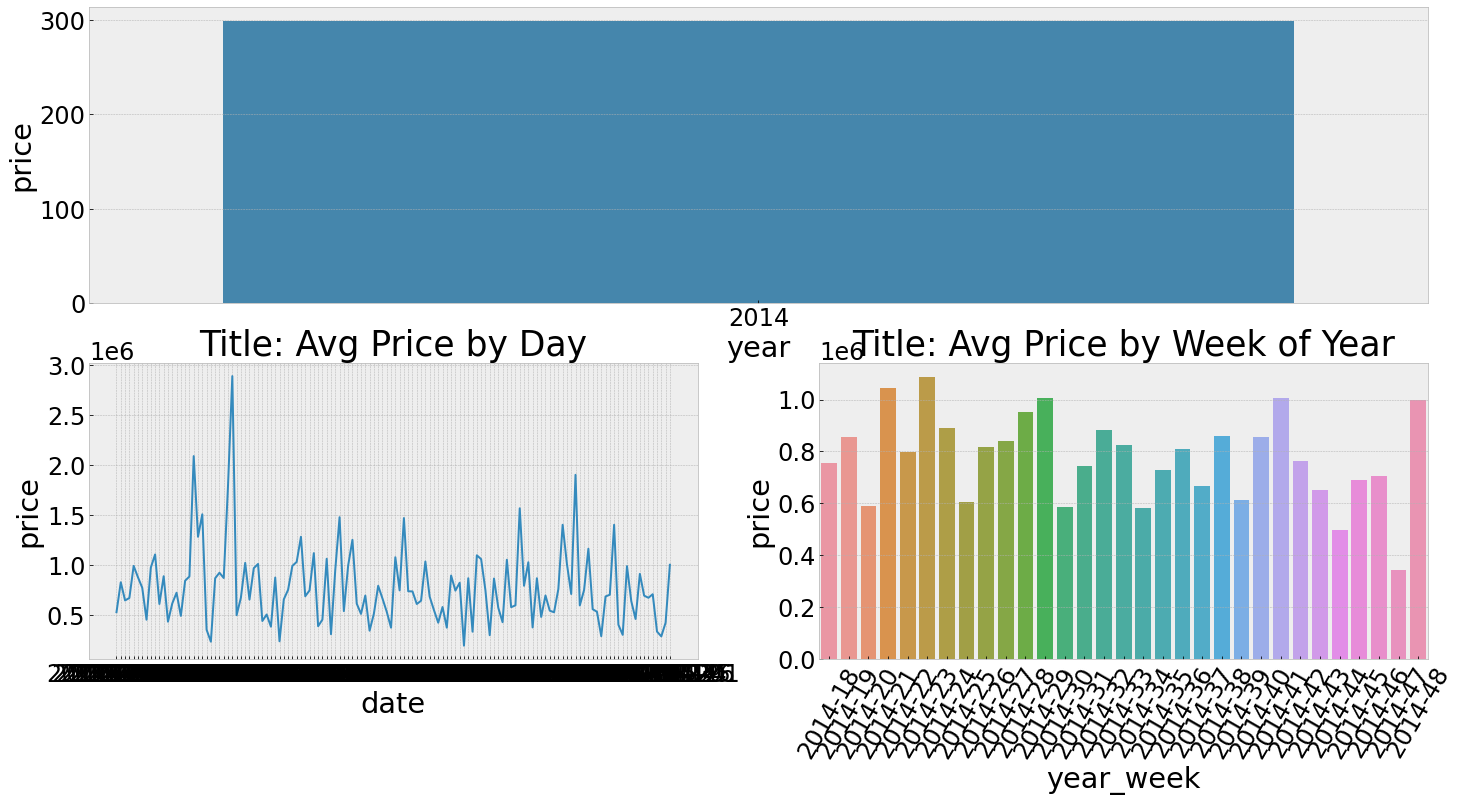

In [109]:
widgets.interactive( update_map,df = fixed(df),
date_limit=date_limit,
year_limit=year_limit,
waterfront_limit=waterfront_limit )